### data9数据

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [61]:
dataset = pd.read_csv('data/data9.csv',engine='python')

In [62]:
dataset

,熔炼电炉变,data
0,86798672,NaN
1,86799088,416.0
2,86799296,208.0
3,86799512,216.0
4,86799928,416.0
...,...,...
145,86833952,216.0
146,86834160,208.0
147,86834376,216.0
148,86834576,200.0


In [63]:
dataset = dataset.fillna(0)
dataset

,熔炼电炉变,data
0,86798672,0.0
1,86799088,416.0
2,86799296,208.0
3,86799512,216.0
4,86799928,416.0
...,...,...
145,86833952,216.0
146,86834160,208.0
147,86834376,216.0
148,86834576,200.0


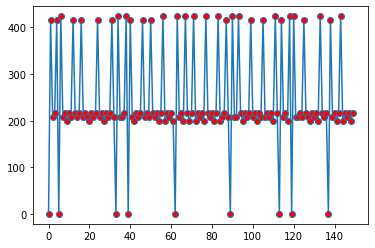

In [64]:
plt.plot(list(range(0,150)),dataset["data"],marker='o',markerfacecolor="r")

In [65]:
#set variable
rs = np.random.RandomState(169)
lendata = dataset.shape[0]
outliers_fraction = 0.04
test_data = []
anomaly = []

In [66]:
def normalize(dataset,a,b):
    scaler = MinMaxScaler(feature_range=(a, b))
    normalize_data = scaler.fit_transform(dataset)
    return normalize_data

In [67]:
#read dataset x,y
x = normalize(pd.DataFrame(dataset, columns=["data"]),-1,1)

In [68]:
ifm = IsolationForest(n_estimators=100,verbose=2,n_jobs=2,max_samples=lendata,random_state=rs,max_features=1)

In [69]:
ifm.fit(x)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Building estimator 1 of 50 for this parallel run (total 100)...Building estimator 1 of 50 for this parallel run (total 100)...

Building estimator 2 of 50 for this parallel run (total 100)...Building estimator 2 of 50 for this parallel run (total 100)...

Building estimator 3 of 50 for this parallel run (total 100)...Building estimator 3 of 50 for this parallel run (total 100)...

Building estimator 4 of 50 for this parallel run (total 100)...Building estimator 4 of 50 for this parallel run (total 100)...

Building estimator 5 of 50 for this parallel run (total 100)...
Building estimator 6 of 50 for this parallel run (total 100)...Building estimator 5 of 50 for this parallel run (total 100)...

Building estimator 7 of 50 for this parallel run (total 100)...Building estimator 6 of 50 for this parallel run (total 100)...

Building estimator 8 of 50 for this parallel run (total 100)...Building estimator 7 of 50 for this parallel run (total 100)...

Building estimator 9 of 50 for this para

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished


IsolationForest(max_features=1, max_samples=150, n_jobs=2,
                random_state=RandomState(MT19937) at 0x7FE0038B2840, verbose=2)

In [70]:
scores_pred = ifm.decision_function(x)

In [71]:
scores_pred

array([-0.17844726, -0.08506246,  0.04763122,  0.04717868, -0.08506246,
       -0.17844726, -0.08287209,  0.04763122,  0.04717868, -0.01538849,
        0.04717868,  0.04763122, -0.08506246,  0.04717868,  0.04763122,
        0.04717868, -0.08506246,  0.04763122,  0.04717868,  0.04763122,
       -0.01538849,  0.04717868,  0.04763122,  0.04717868, -0.08506246,
        0.04763122,  0.04717868, -0.01538849,  0.04717868,  0.04763122,
        0.04717868, -0.08506246,  0.04763122, -0.17844726, -0.08287209,
        0.04763122,  0.04763122,  0.04717868, -0.08287209, -0.17844726,
       -0.08506246,  0.04763122, -0.01538849,  0.04717868,  0.04763122,
        0.04717868, -0.08506246,  0.04763122,  0.04717868,  0.04763122,
       -0.08506246,  0.04717868,  0.04763122,  0.04717868, -0.01538849,
        0.04717868, -0.08287209, -0.01538849,  0.04717868,  0.04763122,
        0.04717868, -0.01538849, -0.17844726, -0.08287209,  0.04763122,
        0.04717868, -0.01538849, -0.08287209,  0.04717868, -0.01

In [72]:
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)

In [73]:
threshold

-0.17844726294450175

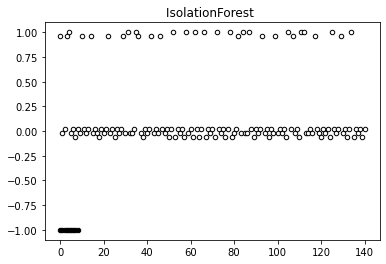

In [74]:
plt.title("IsolationForest ")
for i in scores_pred:
    if i <= threshold:
        #print(i)
        test_data.append(1)
        anomaly.append(i)
    else:
        test_data.append(0)
        
ano_lable = np.column_stack(((dataset['熔炼电炉变'],dataset['data'],x,scores_pred, test_data)))
df = pd.DataFrame(data=ano_lable, columns=['熔炼电炉变','data','x', 'IsoFst_Score','label'])

b = plt.scatter(list(range(0,141)),df['x'][df['label'] == 0], s=20, edgecolor='k',c='white')
c = plt.scatter(list(range(0,9)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

In [75]:
df['x'][df['label'] == 0]

1      0.962264
2     -0.018868
3      0.018868
4      0.962264
6      1.000000
         ...   
145    0.018868
146   -0.018868
147    0.018868
148   -0.056604
149    0.018868
Name: x, Length: 141, dtype: float64

In [76]:
ano_lable = np.column_stack(((df['熔炼电炉变'],df['data'],x,scores_pred, test_data)))

In [77]:
ano_lable

array([[ 8.67986720e+07,  0.00000000e+00, -1.00000000e+00,
        -1.78447263e-01,  1.00000000e+00],
       [ 8.67990880e+07,  4.16000000e+02,  9.62264151e-01,
        -8.50624605e-02,  0.00000000e+00],
       [ 8.67992960e+07,  2.08000000e+02, -1.88679245e-02,
         4.76312168e-02,  0.00000000e+00],
       [ 8.67995120e+07,  2.16000000e+02,  1.88679245e-02,
         4.71786783e-02,  0.00000000e+00],
       [ 8.67999280e+07,  4.16000000e+02,  9.62264151e-01,
        -8.50624605e-02,  0.00000000e+00],
       [ 8.67999280e+07,  0.00000000e+00, -1.00000000e+00,
        -1.78447263e-01,  1.00000000e+00],
       [ 8.68003520e+07,  4.24000000e+02,  1.00000000e+00,
        -8.28720949e-02,  0.00000000e+00],
       [ 8.68005600e+07,  2.08000000e+02, -1.88679245e-02,
         4.76312168e-02,  0.00000000e+00],
       [ 8.68007760e+07,  2.16000000e+02,  1.88679245e-02,
         4.71786783e-02,  0.00000000e+00],
       [ 8.68009760e+07,  2.00000000e+02, -5.66037736e-02,
        -1.53884933e-02

In [78]:
df = pd.DataFrame(data=ano_lable, columns=['熔炼电炉变','data','x', 'IsoFst_Score','label'])

In [79]:
df

,熔炼电炉变,data,x,IsoFst_Score,label
0,86798672.0,0.0,-1.000000,-0.178447,1.0
1,86799088.0,416.0,0.962264,-0.085062,0.0
2,86799296.0,208.0,-0.018868,0.047631,0.0
3,86799512.0,216.0,0.018868,0.047179,0.0
4,86799928.0,416.0,0.962264,-0.085062,0.0
...,...,...,...,...,...
145,86833952.0,216.0,0.018868,0.047179,0.0
146,86834160.0,208.0,-0.018868,0.047631,0.0
147,86834376.0,216.0,0.018868,0.047179,0.0
148,86834576.0,200.0,-0.056604,-0.015388,0.0


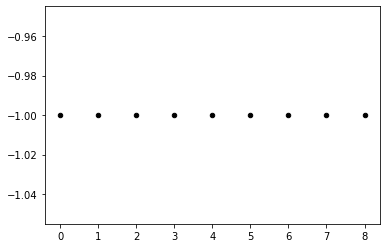

In [80]:
c = plt.scatter(list(range(0,9)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

In [81]:
print("孤立森林阈值  ：",threshold)
print("全量数据样本数：",len(dataset),"个")
print("检测异常样本数：",len(anomaly),"个")

孤立森林阈值  ： -0.17844726294450175
全量数据样本数： 150 个
检测异常样本数： 9 个
